<a href="https://colab.research.google.com/github/jonDel/probionic-microcomputer/blob/main/emg_myoware_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jonDel/emg_myoware.git

Cloning into 'emg_myoware'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 44 (delta 8), reused 37 (delta 4), pack-reused 0
Unpacking objects: 100% (44/44), done.
/content/emg_myoware/src


In [ ]:
%cd emg_myoware/src

In [ ]:
from train_mio import *

/usr/local/lib/python3.7/dist-packages/keras/backend.py:401: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



In [ ]:
df_hold_ball = sync_classes("../datasets/raw/hold_ball_measures_60_trials.csv", "../datasets/annotated_classes/ball_classes.csv")
df_hold_tripod_ball = sync_classes("../datasets/raw/hold_tripod_ball_measures_60_trials.csv", "../datasets/annotated_classes/tripod_ball_classes.csv")
df_hold_cup = sync_classes("../datasets/raw/hold_cup_measures_60_trials.csv", "../datasets/annotated_classes/cup_classes.csv")
df_hold_card = sync_classes("../datasets/raw/hold_card_measures_60_trials.csv", "../datasets/annotated_classes/card_classes.csv")
df_4movs = combine_datasets([df_hold_cup, df_hold_card, df_hold_tripod_ball, df_hold_ball])

In [ ]:
!mkdir logs

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=../results/logs

In [ ]:
predictions, y_true, predictions_prob, model = train_dclstm(df_4movs, epochs=50, overlap_step=0.01, batch_size=1024, validation_split=0.1)

Epoch 1/50
60/60 [==============================] - 5s 90ms/step - loss: 2.8515 - accuracy: 0.6106 - val_loss: 2.8475 - val_accuracy: 0.5163
Epoch 2/50
60/60 [==============================] - 5s 85ms/step - loss: 2.0192 - accuracy: 0.6853 - val_loss: 2.6295 - val_accuracy: 0.5163
Epoch 3/50
60/60 [==============================] - 5s 90ms/step - loss: 1.6129 - accuracy: 0.7189 - val_loss: 2.5656 - val_accuracy: 0.5163
Epoch 4/50
60/60 [==============================] - 5s 90ms/step - loss: 1.3715 - accuracy: 0.7298 - val_loss: 2.3320 - val_accuracy: 0.5163
Epoch 5/50
60/60 [==============================] - 5s 91ms/step - loss: 1.2074 - accuracy: 0.7384 - val_loss: 2.4357 - val_accuracy: 0.2383
Epoch 6/50
60/60 [==============================] - 5s 91ms/step - loss: 1.0810 - accuracy: 0.7501 - val_loss: 2.3927 - val_accuracy: 0.1548
Epoch 7/50
60/60 [==============================] - 5s 90ms/step - loss: 0.9910 - accuracy: 0.7535 - val_loss: 2.1275 - val_accuracy: 0.5191
Epoch 8/50
60

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
def print_results(y_pred: np.ndarray,
                  y_true: np.ndarray,
                  conf_matrix: bool=True,
                  cmap: str="Greys") -> None:
    print(classification_report(y_true, y_pred))
    print(f"Balanced accuracy score: {balanced_accuracy_score(y_true, y_pred):.4f}")
    if conf_matrix:
        df_cm = confusion_matrix(y_true, y_pred, normalize="all")*100
        sn.heatmap(df_cm, annot=True, cmap=cmap)
        figsize=[40/2.54, 30/2.54]
        title="Confusion matrix of classifier"
        annot=True
        annot_kws=None
        cmap=None
        axis_fontsize=(16, 16)
        context="notebook"
        style="darkgrid"
        palette="deep"
        font="sans-serif"
        font_scale=1
        color_codes=True
        rc=None
        plt.clf()
        sn.heatmap(df_cm, annot=annot, annot_kws=annot_kws, cmap=cmap)
        sn.set_theme(context=context, style=style, palette=palette,
                     font=font, font_scale=font_scale, 
                     color_codes=color_codes, rc=rc)
        plt.rcParams['figure.figsize'] = figsize
        plt.xlabel("Predicted label",  fontsize=axis_fontsize[0])
        plt.ylabel("True label",  fontsize=axis_fontsize[1])
        plt.title(title, fontsize=18)
        plt.show()

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15612
           1       0.89      0.91      0.90      4021
           2       0.86      0.84      0.85      3455
           3       0.91      0.79      0.85      3011
           4       0.74      0.95      0.83      3127

    accuracy                           0.90     29226
   macro avg       0.87      0.88      0.87     29226
weighted avg       0.91      0.90      0.90     29226

Balanced accuracy score: 0.8826


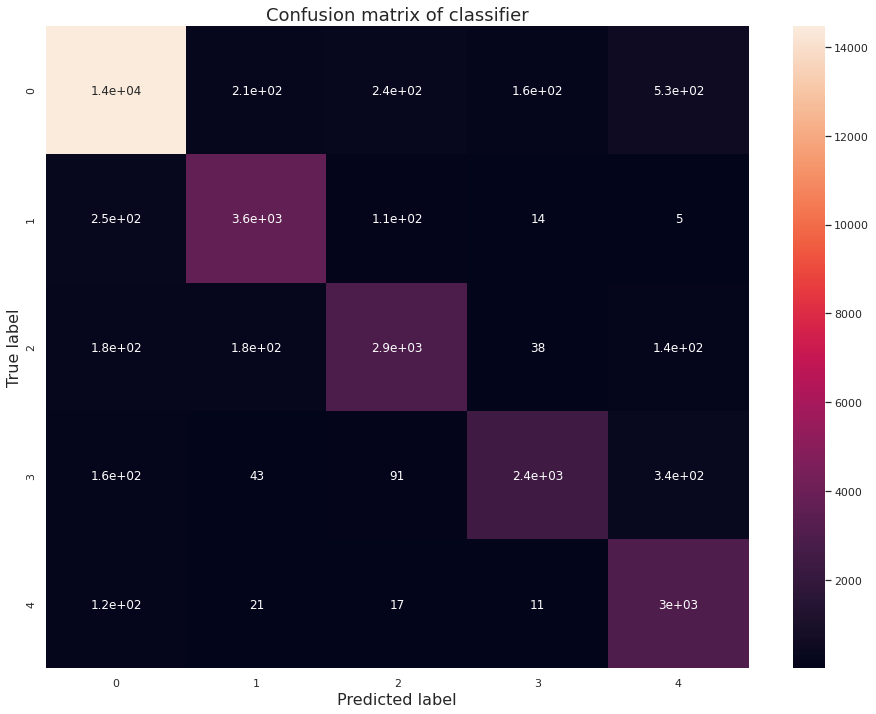

In [ ]:
print_results(predictions, y_true)

In [ ]:
predictions, y_true, predictions_prob, model = train_dclstm(df_4movs, epochs=50, overlap_step=0.01, time_step_window=0.4, batch_size=1024, validation_split=0.1)

Epoch 1/50
60/60 [==============================] - 9s 149ms/step - loss: 2.9037 - accuracy: 0.6127 - val_loss: 2.8302 - val_accuracy: 0.5295
Epoch 2/50
60/60 [==============================] - 9s 146ms/step - loss: 2.1046 - accuracy: 0.6878 - val_loss: 2.7671 - val_accuracy: 0.5205
Epoch 3/50
60/60 [==============================] - 9s 145ms/step - loss: 1.6920 - accuracy: 0.7256 - val_loss: 2.7668 - val_accuracy: 0.5205
Epoch 4/50
60/60 [==============================] - 9s 145ms/step - loss: 1.4018 - accuracy: 0.7514 - val_loss: 2.5674 - val_accuracy: 0.5205
Epoch 5/50
60/60 [==============================] - 9s 146ms/step - loss: 1.2026 - accuracy: 0.7699 - val_loss: 2.4037 - val_accuracy: 0.5210
Epoch 6/50
60/60 [==============================] - 9s 146ms/step - loss: 1.0610 - accuracy: 0.7865 - val_loss: 2.1482 - val_accuracy: 0.5208
Epoch 7/50
60/60 [==============================] - 9s 147ms/step - loss: 0.9648 - accuracy: 0.7917 - val_loss: 2.1728 - val_accuracy: 0.2781
Epoch 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15625
           1       0.90      0.92      0.91      4072
           2       0.93      0.75      0.83      3446
           3       0.86      0.89      0.87      3004
           4       0.90      0.84      0.87      3072

    accuracy                           0.91     29219
   macro avg       0.90      0.87      0.89     29219
weighted avg       0.91      0.91      0.91     29219

Balanced accuracy score: 0.8743


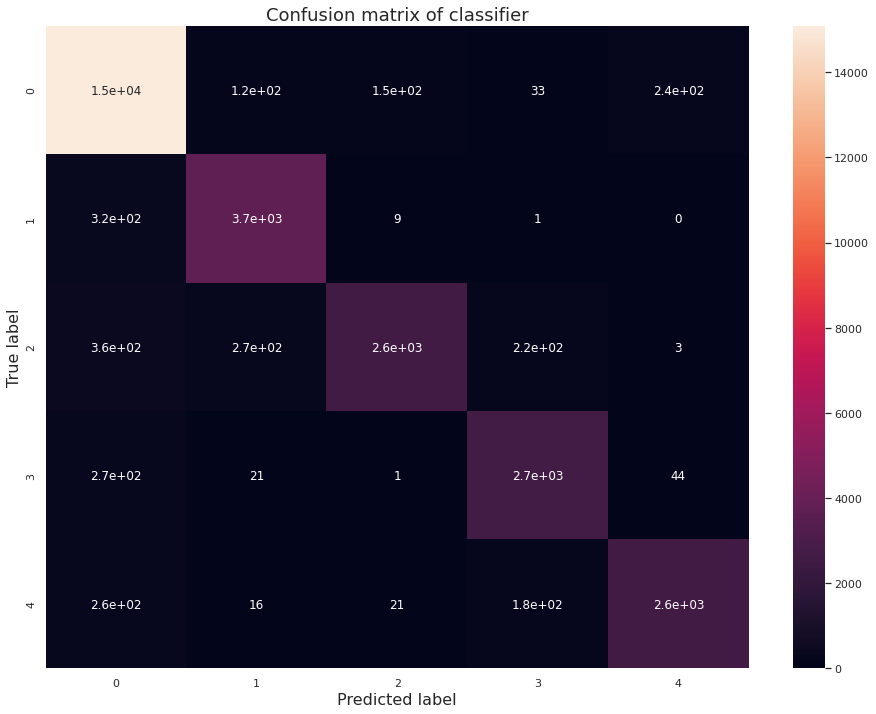

In [ ]:
print_results(predictions, y_true)

In [ ]:
predictions, y_true, predictions_prob, model = train_dclstm(df_4movs, epochs=50, overlap_step=0.01, time_step_window=0.8, batch_size=1024, validation_split=0.1)

Epoch 1/50
60/60 [==============================] - 18s 297ms/step - loss: 2.8088 - accuracy: 0.6225 - val_loss: 3.0679 - val_accuracy: 0.5293
Epoch 2/50
60/60 [==============================] - 18s 295ms/step - loss: 1.9787 - accuracy: 0.7128 - val_loss: 2.9593 - val_accuracy: 0.5293
Epoch 3/50
60/60 [==============================] - 18s 295ms/step - loss: 1.5506 - accuracy: 0.7591 - val_loss: 2.5145 - val_accuracy: 0.5293
Epoch 4/50
60/60 [==============================] - 18s 295ms/step - loss: 1.2880 - accuracy: 0.8001 - val_loss: 2.6419 - val_accuracy: 0.5293
Epoch 5/50
60/60 [==============================] - 18s 295ms/step - loss: 1.1061 - accuracy: 0.8154 - val_loss: 2.5637 - val_accuracy: 0.5293
Epoch 6/50
60/60 [==============================] - 18s 296ms/step - loss: 0.9566 - accuracy: 0.8319 - val_loss: 2.8025 - val_accuracy: 0.1924
Epoch 7/50
60/60 [==============================] - 18s 296ms/step - loss: 0.8606 - accuracy: 0.8354 - val_loss: 2.1085 - val_accuracy: 0.5346

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     15515
           1       0.98      0.90      0.94      4100
           2       0.91      0.90      0.91      3518
           3       0.89      0.86      0.88      3002
           4       0.94      0.87      0.91      3069

    accuracy                           0.93     29204
   macro avg       0.93      0.90      0.91     29204
weighted avg       0.93      0.93      0.93     29204

Balanced accuracy score: 0.9000


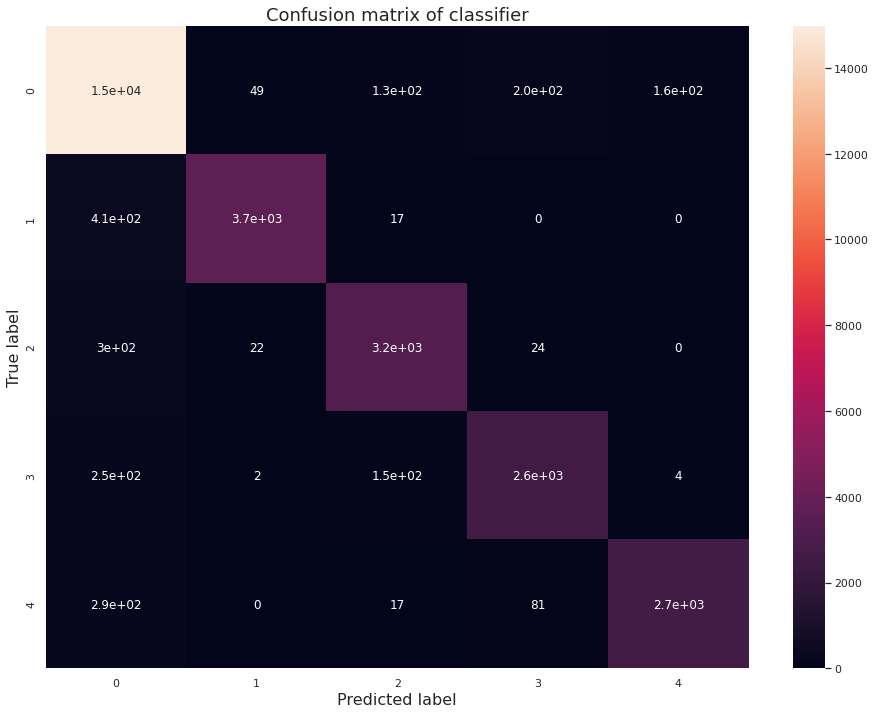

In [ ]:
print_results(predictions, y_true)

In [ ]:
from time import time
X_train, X_test, Y_train, Y_test = prepare_data(df_4movs, time_step_window=0.8)
start=time();model.predict(X_test[0:1]);print(time()-start)
start=time();model.predict(X_test[0:100]);print(time()-start)

0.08032059669494629
0.1530447006225586


In [ ]:
predictions, y_true, predictions_prob, model = train_dclstm(df_4movs, epochs=50, overlap_step=0.01, time_step_window=1.6, batch_size=1024, validation_split=0.1)

Epoch 1/50
60/60 [==============================] - 33s 545ms/step - loss: 2.9135 - accuracy: 0.6279 - val_loss: 3.2506 - val_accuracy: 0.5261
Epoch 2/50
60/60 [==============================] - 33s 551ms/step - loss: 2.0475 - accuracy: 0.7248 - val_loss: 3.3812 - val_accuracy: 0.5261
Epoch 3/50
60/60 [==============================] - 33s 558ms/step - loss: 1.5799 - accuracy: 0.7824 - val_loss: 3.2042 - val_accuracy: 0.5261
Epoch 4/50
60/60 [==============================] - 34s 564ms/step - loss: 1.2754 - accuracy: 0.8334 - val_loss: 3.0857 - val_accuracy: 0.5261
Epoch 5/50
60/60 [==============================] - 34s 568ms/step - loss: 1.0325 - accuracy: 0.8634 - val_loss: 2.8013 - val_accuracy: 0.5264
Epoch 6/50
60/60 [==============================] - 34s 573ms/step - loss: 0.9097 - accuracy: 0.8649 - val_loss: 2.5093 - val_accuracy: 0.5276
Epoch 7/50
60/60 [==============================] - 35s 578ms/step - loss: 0.7961 - accuracy: 0.8753 - val_loss: 2.4857 - val_accuracy: 0.5313

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     15457
           1       0.99      0.91      0.95      4037
           2       0.97      0.93      0.95      3465
           3       0.97      0.82      0.89      3097
           4       0.89      0.90      0.89      3118

    accuracy                           0.94     29174
   macro avg       0.95      0.91      0.92     29174
weighted avg       0.94      0.94      0.94     29174

Balanced accuracy score: 0.9072


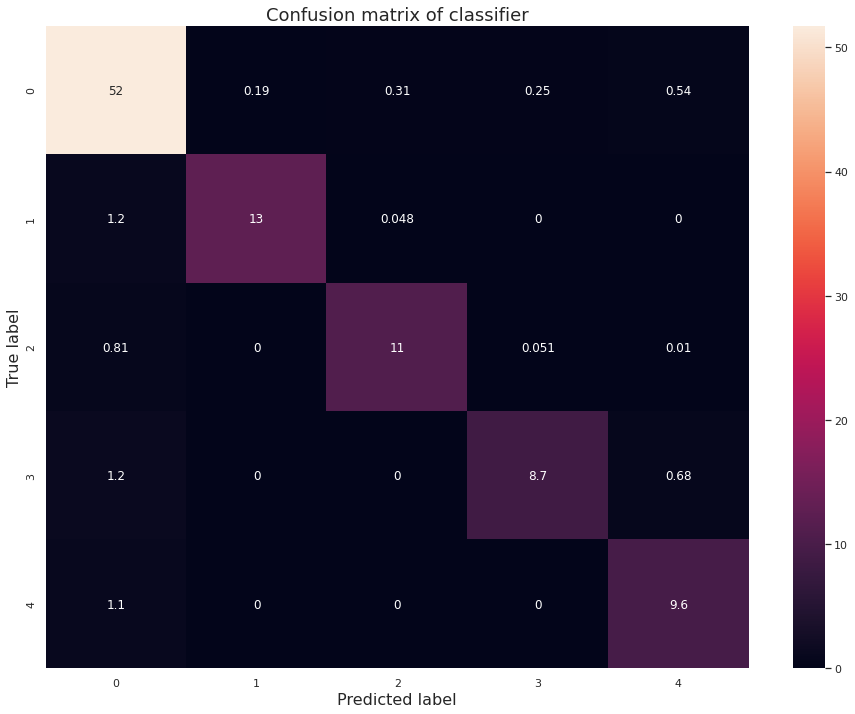

In [ ]:
print_results(predictions, y_true)

In [ ]:
X_train, X_test, Y_train, Y_test = prepare_data(df_4movs, time_step_window=1.6)
start=time();model.predict(X_test[0:1]);print(time()-start)
start=time();model.predict(X_test[0:100]);print(time()-start)

0.11094045639038086
0.20115351676940918


In [ ]:
! pip install -q tensorflow-model-optimization


     |████████████████████████████████| 211 kB 7.4 MB/s 
